In [3]:
!pip install pandas_datareader
!pip install pandas
!pip install numpy
!pip install seaborn
!pip install yfinance
!pip install plotly
!pip install matplotlib



Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 50 kB 3.0 MB/s 
     |████████████████████████████████| 110 kB 9.8 MB/s 
     |████████████████████████████████| 112 kB 55.6 MB/s 
     |████████████████████████████████| 4.1 MB 64.0 MB/s 
     |████████████████████████████████| 128 kB 61.2 MB/s 
     |████████████████████████████████| 62 kB 1.2 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0

In [4]:
import pandas as pd
import numpy as np
from pandas_datareader import data
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import yfinance as yf
plt.rcParams['figure.figsize'] = (15,10)


Obtendo dados

In [6]:
acoes = ['ITUB4.SA', 'BBDC4.SA', 'SANB11.SA', 'BBAS3.SA']
acoes_df = pd.DataFrame()
for acao in acoes:
  acoes_df[acao] = yf.download(acao, start='2013-01-01')['Close']

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Tratando os Dados

In [9]:
acoes_df = acoes_df.rename(columns={'ITUB4.SA': 'Itaú', 'BBDC4.SA': 'Bradesco', 'SANB11.SA': 'Santander', 'BBAS3.SA': 'BancoDoBrasil'})
acoes_df['Date'] = acoes_df.index
df = acoes_df[['Date', 'Itaú', 'Bradesco', 'Santander', 'BancoDoBrasil']]
acoes_df_normalizado = df.copy()
for i in acoes_df_normalizado.columns[1:]:
  acoes_df_normalizado[i] = acoes_df_normalizado[i] / acoes_df_normalizado[i][0]


Gerando visualizações

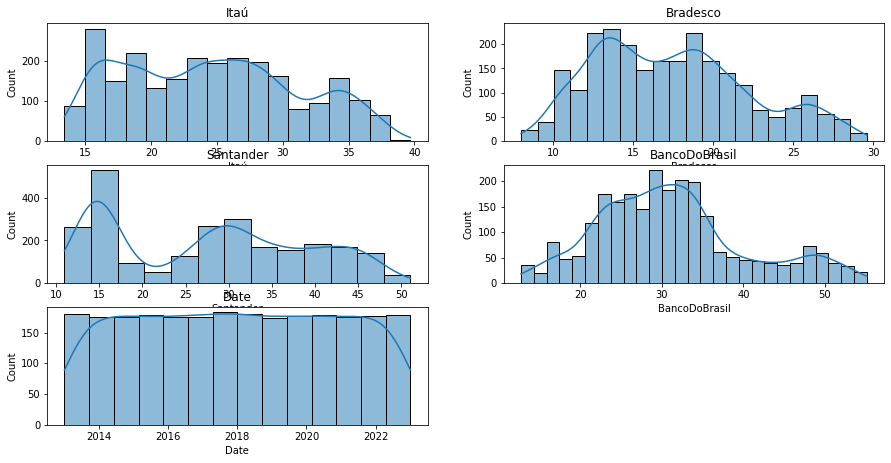

In [11]:
for i in range(len(acoes_df.columns)):
  plt.subplot(4, 2, i + 1)
  sns.histplot(acoes_df[acoes_df.columns[i]], kde = True)
  plt.title(acoes_df.columns[i])

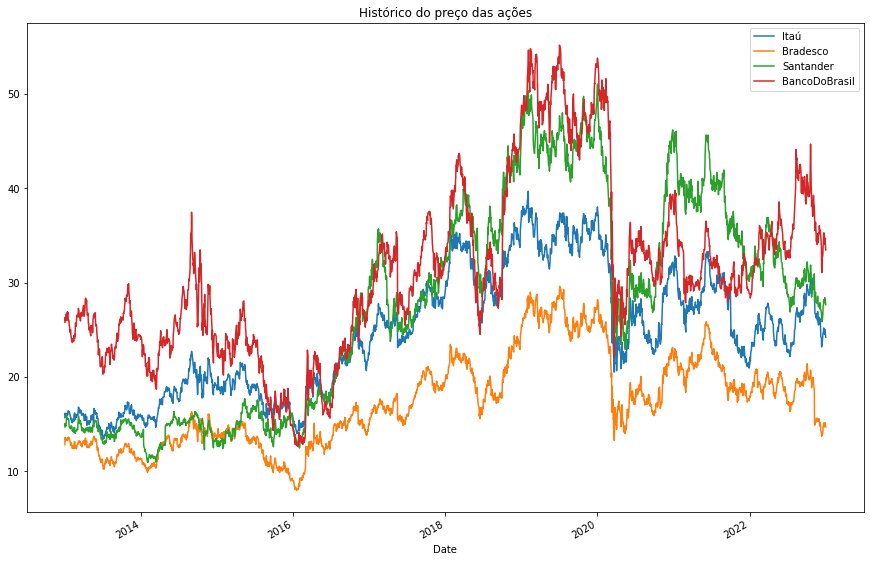

In [12]:
acoes_df.plot(x = 'Date', title = 'Histórico do preço das ações')

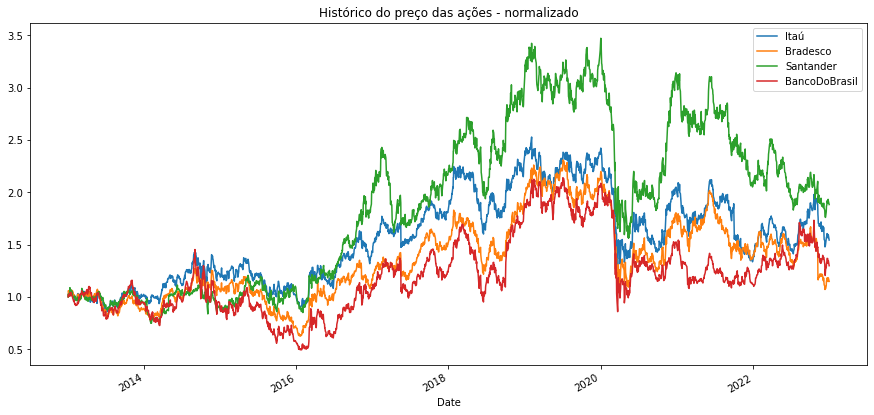

In [13]:
acoes_df_normalizado.plot(x = 'Date', figsize = (15,7), title = 'Histórico do preço das ações - normalizado')

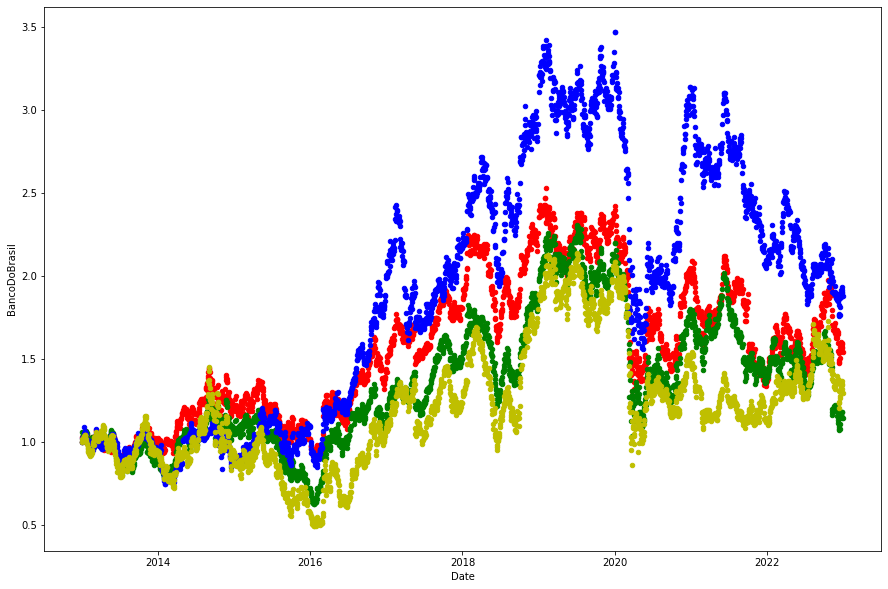

In [14]:
ax1 = acoes_df_normalizado.plot( kind='scatter',x = 'Date', y = 'Itaú',color='r')
ax2 = acoes_df_normalizado.plot( kind='scatter',x = 'Date', y = 'Bradesco',color='g',ax=ax1)
ax3 = acoes_df_normalizado.plot( kind='scatter',x = 'Date', y = 'Santander',color='b',ax=ax1)
ax4 = acoes_df_normalizado.plot( kind='scatter',x = 'Date', y = 'BancoDoBrasil',color='y',ax=ax1)